In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Loading dataset**

In [2]:
df= pd.read_csv('Mall_Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**data types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Shape of the dataset**

In [8]:
df.shape

(200, 5)

**Missing values**

In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**duplicated values**

In [9]:
df.duplicated().sum()

0

**Summary statistics to understand ranges of values**

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Data Preprocessing**

**Standard Scaler**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [30]:
print(df_scaled)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male -1.424569           -1.738999               -0.434801   
1             2    Male -1.281035           -1.738999                1.195704   
2             3  Female -1.352802           -1.700830               -1.715913   
3             4  Female -1.137502           -1.700830                1.040418   
4             5  Female -0.563369           -1.662660               -0.395980   
..          ...     ...       ...                 ...                     ...   
195         196  Female -0.276302            2.268791                1.118061   
196         197  Female  0.441365            2.497807               -0.861839   
197         198    Male -0.491602            2.497807                0.923953   
198         199    Male -0.491602            2.917671               -1.250054   
199         200    Male -0.635135            2.917671                1.273347   

     Cluster  
0          1

# **Clustering Analysis**

**Determine Optimal Clusters (Elbow Method & Silhouette Score)**

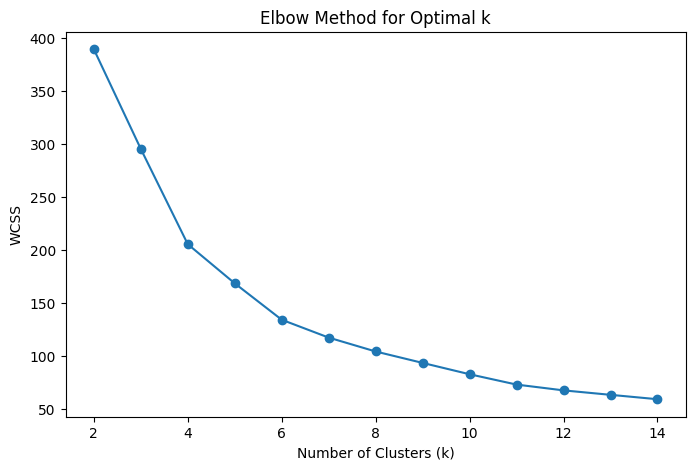

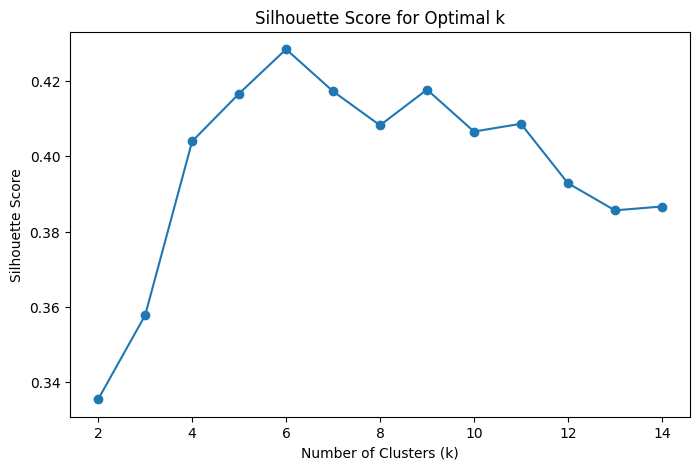

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()



**Apply K-Means Clustering**

In [32]:
optimal_k = 5  # Replace with the best k from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [33]:
print(df['Cluster'])

0      1
1      1
2      0
3      1
4      1
      ..
195    2
196    3
197    2
198    3
199    2
Name: Cluster, Length: 200, dtype: int32


In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


# **Visualization**

**2D Scatter Plot (Using PCA for Dimensionality Reduction)**

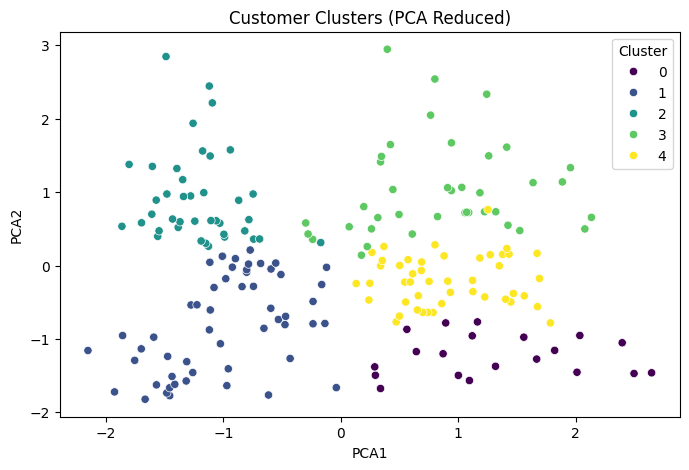

In [39]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df)
plt.title('Customer Clusters (PCA Reduced)')
plt.show()


**Pair Plot**

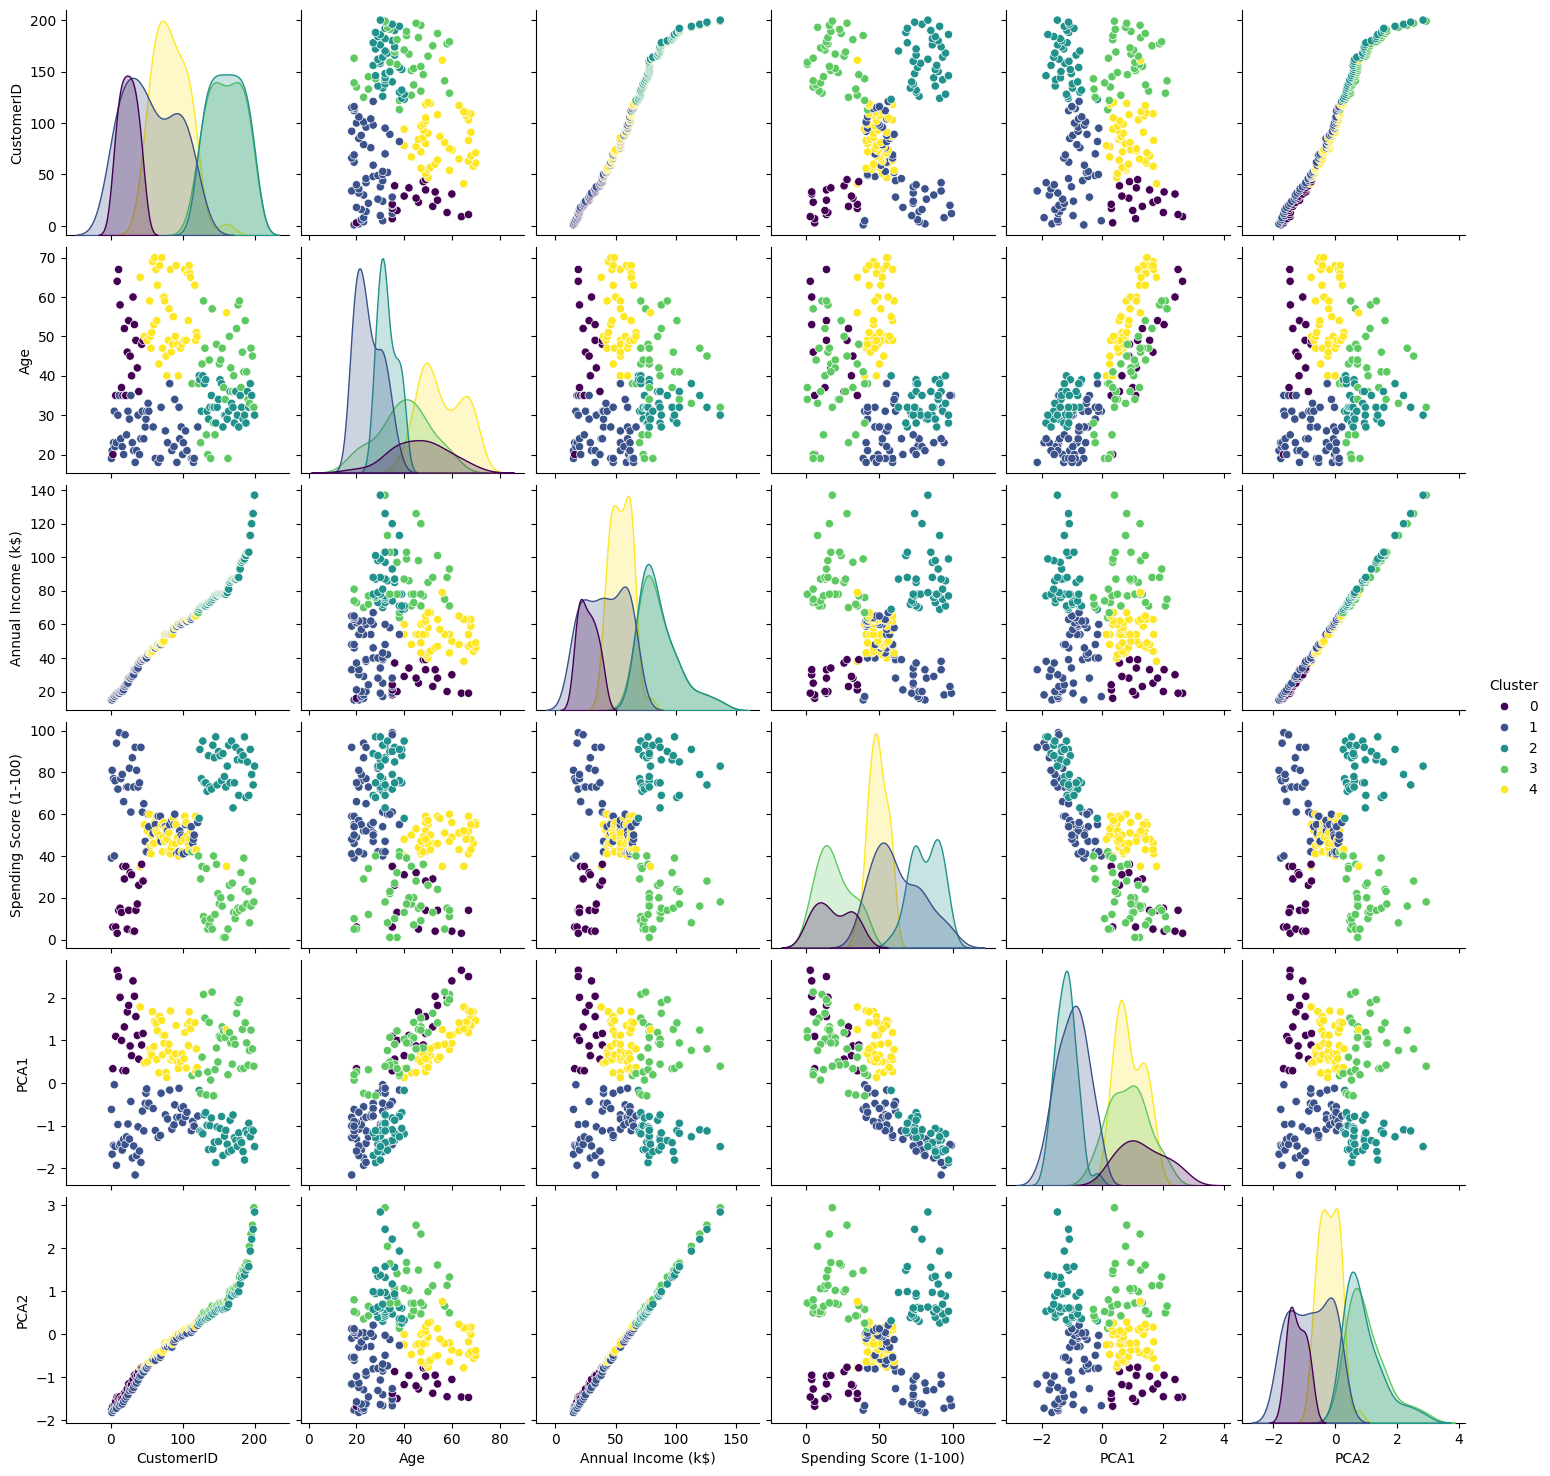

In [40]:
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()


**Centroid Visualization**

In [41]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids = scaler.inverse_transform(centroids)  # Convert back to original scale
centroids_df = pd.DataFrame(centroids, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("Cluster Centroids:\n", centroids_df)


Cluster Centroids:
          Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  25.185185           41.092593               62.240741
2  32.875000           86.100000               81.525000
3  39.871795           86.102564               19.358974
4  55.638298           54.382979               48.851064


# **Deliverables**

**Clustered Dataset (customer_data_with_clusters.csv)**

In [42]:
df.to_csv("customer_data_with_clusters.csv", index=False)


**Heap Map**

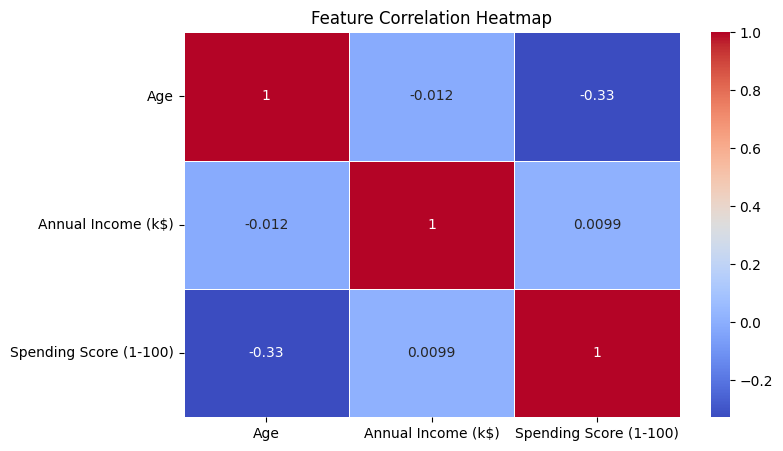

In [45]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#**Overall Strategic Recommendations**
# Segmented Promotions:

* Luxury buyers → Exclusive perks
* Budget customers → Discounts & bundles
* Young spenders → Social media promotions
* Cautious buyers → Free trials, product demos
# Loyalty & Retention Strategies:

* High spenders → VIP membership programs
* Budget-conscious customers → Reward points for repeat purchases
* Moderate spenders → Subscription models
 # Improving Customer Lifetime Value (CLV):








* Provide personalized experiences for different income levels
* Increase engagement with marketing tailored to each segment
* Use email, SMS, and social media marketing differently for each group